In [23]:
import numpy as np
import matplotlib.pyplot as pp
from src_dir import *

In [24]:
SGDdat=np.loadtxt("./logs/LinearLayerTest/SGD/PerformanceData.txt")
ADAdat=np.loadtxt("./logs/LinearLayerTest/Adagrad/PerformanceData.txt")
n_steps=len(SGDdat[:,0])

In [40]:
ML_GMRESTimeSGD=SGDdat[:,3]
ML_GMRESTimeAdagrad=ADAdat[:,3]
GMRESTimeSGD=SGDdat[:,2]
GMRESTimeAdagrad=ADAdat[:,2]
idx=np.asarray(range(0,n_steps ))

In [45]:
AVGSGDML=np.zeros((n_steps,1))
for j in range(0,n_steps):
    AVGSGDML[j]=moving_average(ML_GMRESTimeSGD[:j],j)
    
AVGADAML=np.zeros((n_steps,1))
for j in range(0,n_steps):
    AVGADAML[j]=moving_average(ML_GMRESTimeAdagrad[:j],j)
    
    
AVGSGD=np.zeros((n_steps,1))
for j in range(0,n_steps):
    AVGSGD[j]=moving_average(GMRESTimeSGD[:j],j)
    
AVGADA=np.zeros((n_steps,1))
for j in range(0,n_steps):
    AVGADA[j]=moving_average(GMRESTimeAdagrad[:j],j)
    
    
RatioADA=np.divide(AVGADA,AVGADAML)
RatioSGD=np.divide(AVGSGD,AVGSGDML)

/home/kl748/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/kl748/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


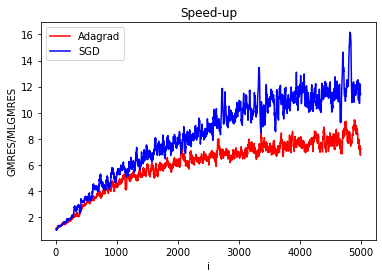

In [52]:
pp.plot(idx[10:],RatioADA[10:],'r',label='Adagrad')
pp.plot(idx[10:],RatioSGD[10:],'b',label='SGD')
pp.xlabel('i')
pp.title('Speed-up')
pp.ylabel("GMRES/MLGMRES")
pp.legend(loc='best')